# Exploratory data analysis (EDA) of apartments data

## Libraries and settings

In [2]:
# Libraries
import os # for directory operations
import pandas as pd # for data manipulation
import numpy as np # for data manipulation
import seaborn as sns # for data visualization
import matplotlib.pyplot as plt # for data visualization
import statsmodels.api as sm # for statistical models
import pylab as py # for statistical models

# seaborn graphics settings
sns.set(color_codes=True) # adds a nice background to the graphs

# Ignore warnings
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore") # ignore warnings

# Show current working directory
print(os.getcwd()) # print current working directory

d:\Explorative_Data_Analysis_and_Visualization


## Univariate non-graphical exploratory data analysis (EDA)

### Importing the enriched apartment data

In [3]:
# Read and select variables
df_orig = pd.read_csv("apartments_data_enriched_cleaned.csv")[['web-scraper-order',
                                                                'address_raw',
                                                                'lat',
                                                                'lon',
                                                                'bfs_number',
                                                                'bfs_name',
                                                                'rooms', 
                                                                'area', 
                                                                'luxurious', 
                                                                'price', 
                                                                'price_per_m2',
                                                                'pop',
                                                                'pop_dens',
                                                                'emp',
                                                                'frg_pct',
                                                                'mean_taxable_income']] # read data set

# Remove duplicates
df_orig = df_orig.drop_duplicates() # remove duplicates
df_orig.head(5) # show first 5 rows

# Remove missing values
df = df_orig.dropna() # remove missing values
df.head(5) # show first 5 rows

web-scraper-order                           address_raw        lat  \
0      1693998201-1     Neuhusstrasse 6, 8630 Rüti ZH, ZH  47.252171   
1    1693998233-172   Widacherstrasse 5, 8630 Rüti ZH, ZH  47.252087   
2    1693998256-331         Widenweg 14, 8630 Rüti ZH, ZH  47.253670   
3    1693998265-381              Rain 1, 8630 Rüti ZH, ZH  47.259834   
4    1693998276-419  Bachtelstrasse 24b, 8630 Rüti ZH, ZH  47.266113   

        lon  bfs_number   bfs_name  rooms   area  luxurious   price  \
0  8.845797         118  Rüti (ZH)    3.0   49.0          0  1441.0   
1  8.854919         118  Rüti (ZH)    3.0  111.0          0  2600.0   
2  8.853993         118  Rüti (ZH)    3.0   58.0          0  1490.0   
3  8.851705         118  Rüti (ZH)    4.0  118.0          0  3240.0   
4  8.866872         118  Rüti (ZH)    3.0   66.0          0  1450.0   

   price_per_m2    pop     pop_dens     emp    frg_pct  mean_taxable_income  
0         29.41  12286  1221.272366  5053.0  24.841283         65362.042683  
1         23.42  12286  1221.272366  5053.0  24.841283         65362.042683  
2         25.69  12286  1221.272366  5053.0  24.841283         65362.042683  
3         27.46  12286  1221.272366  5053.0  24.841283         65362.042683  
4         21.97  12286  1221.272366  5053.0  24.841283         65362.042683

### Quantiles

In [4]:
# Descriptive statistics. Show quantiles for numeric variables
df[['price','rooms', 'area', 'price_per_m2', 'pop_dens']].quantile(q=[0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95]).round(2)

price  rooms    area  price_per_m2  pop_dens
0.05  1356.50    1.0   26.00         18.65    340.27
0.10  1500.00    1.5   43.00         20.36    525.66
0.25  1849.25    2.5   63.25         23.39   1044.63
0.50  2390.00    3.5   86.00         27.95   1662.60
0.75  3027.50    4.5  108.00         38.00   4778.99
0.90  3964.00    4.5  140.00         51.61   4778.99
0.95  4970.50    5.5  160.00         64.00   4778.99

### Shape (number of rows and colums)

In [5]:
# Number of rows and columns
print(df.shape) # show number of rows and columns

(774, 16)


### Data types

In [6]:
df.dtypes # show data types of variables

web-scraper-order       object
address_raw             object
lat                    float64
lon                    float64
bfs_number               int64
bfs_name                object
rooms                  float64
area                   float64
luxurious                int64
price                  float64
price_per_m2           float64
pop                      int64
pop_dens               float64
emp                    float64
frg_pct                float64
mean_taxable_income    float64
dtype: object

### Summary statistics of numeric variables

In [7]:
df.describe() # show descriptive statistics. Only for numeric variables. Includes count, mean, std, min, max, and quantiles

lat         lon  bfs_number       rooms        area   luxurious  \
count  774.000000  774.000000  774.000000  774.000000  774.000000  774.000000   
mean    47.407658    8.600456  186.255814    3.417959   88.899225    0.011628   
std      0.085577    0.117768   81.548986    1.282049   39.508987    0.107273   
min     47.195290    8.367652    1.000000    1.000000    8.000000    0.000000   
25%     47.361180    8.517483  121.000000    2.500000   63.250000    0.000000   
50%     47.396210    8.563061  230.000000    3.500000   86.000000    0.000000   
75%     47.481299    8.711050  261.000000    4.500000  108.000000    0.000000   
max     47.693893    8.915933  298.000000    8.500000  282.000000    1.000000   

             price  price_per_m2            pop     pop_dens            emp  \
count   774.000000    774.000000     774.000000   774.000000     774.000000   
mean   2652.958656     32.857817  159277.266150  2489.306724  174995.766150   
std    1281.909438     14.886219  185867.397397  1741.332294  222830.654294   
min      86.000000     10.750000     698.000000    87.959866     129.000000   
25%    1849.250000     23.390000    8775.000000  1044.628957    3460.000000   
50%    2390.000000     27.950000   27746.000000  1662.597326   19226.000000   
75%    3027.500000     38.005000  420217.000000  4778.994655  491193.000000   
max    9950.000000    100.000000  420217.000000  4778.994655  491193.000000   

          frg_pct  mean_taxable_income  
count  774.000000           774.000000  
mean    27.791852         80502.925758  
std      7.566620         14401.535269  
min      7.547170         62000.541872  
25%     24.535004         70988.017354  
50%     28.043732         80595.528256  
75%     32.458468         82932.737704  
max     46.226483        174434.537050

### Statistical measures (min, max, std, mean, median, count) for selected variables

In [8]:
# Price
print('Price:',
      'Count:', round(df.price.count(), 1),
      'Min:', round(df.price.min(), 1),
      'Max:', round(df.price.max(), 1),
      'Mean:', round(df.price.mean(), 1),
      'Median:', round(df.price.median(), 1),
      'Std:', round(df.price.std(), 1))

# Area
print('Area:',
      'Count:', round(df.area.count(), 1),
      'Min:', round(df.area.min(), 1),
      'Max:', round(df.area.max(), 1),
      'Mean:', round(df.area.mean(), 1),
      'Median:', round(df.area.median(), 1),
      'Std:', round(df.area.std(), 1))

Price: Count: 774 Min: 86.0 Max: 9950.0 Mean: 2653.0 Median: 2390.0 Std: 1281.9
Area: Count: 774 Min: 8.0 Max: 282.0 Mean: 88.9 Median: 86.0 Std: 39.5


### Skewness

In [9]:
df[['price','rooms', 'area']].skew() # show skewness for numeric variables

price    2.182259
rooms    0.194969
area     0.888217
dtype: float64

### Kurtosis

In [10]:
df[['price','rooms', 'area']].kurtosis() # show kurtosis for numeric variables

price    6.933243
rooms    0.146377
area     1.963584
dtype: float64

### Extreme values

In [11]:
# Low costs apartments
df[df['price_per_m2'] <= 10] # show apartments with price per m2 lower than 10

Empty DataFrame
Columns: [web-scraper-order, address_raw, lat, lon, bfs_number, bfs_name, rooms, area, luxurious, price, price_per_m2, pop, pop_dens, emp, frg_pct, mean_taxable_income]
Index: []

In [12]:
# Very expansive apartments
df[df['price_per_m2'] >= 100] # show apartments with price per m2 higher than 100

web-scraper-order                       address_raw        lat       lon  \
150    1693998305-585  Steinstrasse 35, 8003 Zürich, ZH  47.366997  8.520324   

     bfs_number bfs_name  rooms  area  luxurious   price  price_per_m2  \
150         261   Zürich    1.0  15.0          0  1500.0         100.0   

        pop     pop_dens       emp    frg_pct  mean_taxable_income  
150  420217  4778.994655  491193.0  32.458468         82932.737704

### Get a list of categories of categorical variable

In [13]:
np.array(pd.Categorical(df['bfs_name']).categories) # show categories of categorical variable

array(['Adliswil', 'Aeugst am Albis', 'Affoltern am Albis', 'Altikon',
       'Andelfingen', 'Bachenbülach', 'Bassersdorf', 'Bauma',
       'Bonstetten', 'Brütten', 'Bülach', 'Dielsdorf', 'Dietikon',
       'Dietlikon', 'Dättlikon', 'Dübendorf', 'Dürnten', 'Egg', 'Eglisau',
       'Elsau', 'Embrach', 'Fehraltorf', 'Feuerthalen',
       'Freienstein-Teufen', 'Fällanden', 'Glattfelden', 'Gossau (ZH)',
       'Greifensee', 'Hausen am Albis', 'Hedingen', 'Herrliberg',
       'Hettlingen', 'Hinwil', 'Hittnau', 'Hochfelden', 'Hombrechtikon',
       'Höri', 'Hüttikon', 'Kloten', 'Knonau', 'Küsnacht (ZH)',
       'Langnau am Albis', 'Laufen-Uhwiesen', 'Lindau', 'Lufingen',
       'Maur', 'Meilen', 'Mettmenstetten', 'Männedorf', 'Mönchaltorf',
       'Neerach', 'Neftenbach', 'Niederglatt', 'Niederhasli',
       'Niederweningen', 'Nürensdorf', 'Oberengstringen', 'Oberglatt',
       'Obfelden', 'Oetwil am See', 'Oetwil an der Limmat', 'Opfikon',
       'Ossingen', 'Pfungen', 'Pfäffikon', 'Regensd

## Multivariate non-graphical exploratory data analysis (EDA)

### Cross-tabulation

In [14]:
# Cross-tabulation
pd.crosstab(df['luxurious'], df['rooms']) # show cross table for two categorical variables

rooms      1.0  1.5  2.0  2.5  3.0  3.5  4.0  4.5  5.0  5.5  6.0  6.5  7.0  \
luxurious                                                                    
0           50   33   38  135   44  200   28  163    3   52    2   11    2   
1            0    0    0    6    0    3    0    0    0    0    0    0    0   

rooms      7.5  8.5  
luxurious            
0            3    1  
1            0    0

### Pivot tables

In [15]:
# Pivot tables
# Using pivot_table to reshape the data and calculate means 
pd.pivot_table(df[['rooms', 'price', 'price_per_m2', 'area', 'luxurious']],
               index=['rooms', 'luxurious'],
               values=['price', 'price_per_m2', 'area'],
               aggfunc=(np.mean, 'count')) # show pivot table. Index is the grouping variable. Values are the variables to be summarized. aggfunc is the function to be used for summarizing

area             price              price_per_m2           
                count        mean count         mean        count       mean
rooms luxurious                                                             
1.0   0            50   32.920000    50  1306.220000           50  47.140400
1.5   0            33   35.969697    33  1963.515152           33  59.417576
2.0   0            38   55.184211    38  2120.078947           38  40.757105
2.5   0           135   66.800000   135  2382.755556          135  37.010000
      1             6   72.166667     6  3339.500000            6  45.978333
3.0   0            44   68.159091    44  1964.022727           44  28.677955
3.5   0           200   89.770000   200  2648.980000          200  29.494700
      1             3  101.666667     3  6036.666667            3  59.826667
4.0   0            28   98.464286    28  2852.357143           28  29.646429
4.5   0           163  114.926380   163  3086.570552          163  26.493436
5.0   0             3  108.000000     3  2881.666667            3  26.376667
5.5   0            52  153.250000    52  3590.653846           52  23.587500
6.0   0             2  185.000000     2  3800.000000            2  22.365000
6.5   0            11  167.363636    11  4114.272727           11  24.638182
7.0   0             2  175.000000     2  6350.000000            2  36.325000
7.5   0             3  205.000000     3  4765.000000            3  23.273333
8.5   0             1  210.000000     1  8500.000000            1  40.480000

### Correlation matrix

In [16]:
corr = df[['rooms', 
          'area', 
          'price', 
          'price_per_m2',
          'pop_dens',
          'frg_pct']].cov().corr()
corr # show correlation matrix

rooms      area     price  price_per_m2  pop_dens   frg_pct
rooms         1.000000  0.985482  0.502177     -0.488832 -0.598241 -0.684564
area          0.985482  1.000000  0.641669     -0.333662 -0.453513 -0.550872
price         0.502177  0.641669  1.000000      0.508919  0.392360  0.286408
price_per_m2 -0.488832 -0.333662  0.508919      1.000000  0.991304  0.970341
pop_dens     -0.598241 -0.453513  0.392360      0.991304  1.000000  0.993646
frg_pct      -0.684564 -0.550872  0.286408      0.970341  0.993646  1.000000

### Covariance matrix

In [17]:
cov = df[['rooms', 
          'area', 
          'price', 
          'price_per_m2',
          'pop_dens',
          'frg_pct']].cov()
cov # show covariance matrix

rooms          area         price  price_per_m2  \
rooms           1.643649     42.404399  7.738317e+02     -9.039862   
area           42.404399   1560.960077  3.099798e+04   -268.411152   
price         773.831662  30997.977717  1.643292e+06   5480.634631   
price_per_m2   -9.039862   -268.411152  5.480635e+03    221.599518   
pop_dens     -701.524676 -18075.474981  6.438886e+05  16060.083639   
frg_pct        -2.634166    -77.525117  8.775410e+02     39.611806   

                  pop_dens      frg_pct  
rooms        -7.015247e+02    -2.634166  
area         -1.807547e+04   -77.525117  
price         6.438886e+05   877.541024  
price_per_m2  1.606008e+04    39.611806  
pop_dens      3.032238e+06  8630.505180  
frg_pct       8.630505e+03    57.253741

## Univariate graphical exploratory data analysis (EDA)

### Line chart (matplotlib)

In [18]:
# Generate some useful values (time series)
x = [1990, 1995, 2000, 2005, 2010, 2015, 2020, 2025]
y = [100, 125, 156, 167, 175, 215, 230, 255]

# Create figure
fig = plt.figure(figsize=(7,4)) # create figure
plt.plot(x, y, color="green") # plot line
plt.title('Development of rental apartment prices', fontsize=12) # add title
plt.xlabel('year', fontsize=10) # add x label
plt.ylabel('price index (1990 = 100%)', fontsize=10) # add y label
plt.xticks(fontsize=10) # add x ticks
plt.yticks(fontsize=10) # add y ticks

plt.show() # show plot

### Boxplot (seaborn)

<Axes: xlabel='area'>

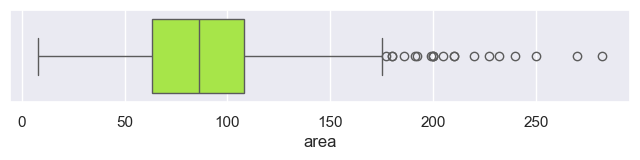

In [19]:
plt.figure(figsize=(8,1.2)) # create figure
plt.ticklabel_format(style='plain') # remove scientific notation
sns.boxplot(x=df['area'], color="greenyellow") # plot boxplot

### Histogram  (matplotlib)

In [20]:
# Plot Histogram
fig = plt.figure( figsize=(7,4)) # create figure

plt.xticks(fontsize=14, rotation=0) # set fontsize and rotation of x ticks
plt.yticks(fontsize=14, rotation=0) # set fontsize and rotation of y ticks

n, bins, patches = plt.hist(x=df['price_per_m2'], 
                            bins=25, # number of bins
                            color='#42AD12', # color of bars
                            alpha=0.5,  # transparency of bars
                            rwidth=0.95 # width of bars
                   ) # plot histogram
plt.grid(True) # add grid
plt.ticklabel_format(style='plain') # remove scientific notation
plt.grid(axis='y', alpha=0.75) # add grid

# Set labels
plt.xlabel('price_per_m2', fontsize=10, labelpad=10) # add x label
plt.ylabel('Number of apartments', fontsize=10, labelpad=10) # add y label
plt.title('Histogram of price_per_m2', fontsize=12, pad=10) # add title

# Set fontsize of tick labels
plt.xticks(fontsize = 10) # set fontsize of x ticks
plt.yticks(fontsize = 10) # set fontsize of y ticks

plt.show() # show plot

### Density plot  (seaborn)

In [21]:
plt.figure(figsize=(7,4)) # create figure
sns.distplot(df['price_per_m2'], 
             hist=True, # plot histogram
             kde=True, # plot density plot
             bins=20, # set number of bins
             color = 'green', # set color of histogram bars
             hist_kws={'edgecolor':'black'}, # add black edges to histogram bars
             kde_kws={'linewidth': 2}, # set linewidth of density plot
            ) # plot density plot
plt.title('Density plot price per m2', fontsize=12, pad=10) # add title
plt.xlabel('price_per_m2', fontsize=12, labelpad=10) # add x label
plt.ylabel('Density', fontsize=12, labelpad=10) # add y label
plt.grid(True) # add grid
plt.show() # show plot

### Quantile-Quantile (QQ-) plot

In [22]:
# Variable (standardized)
x = 'area' # set variable
df_qq = df # create copy of data frame
df_qq['var'] = (df[x]-df[x].mean()) / df[x].std() # standardize variable
print(df_qq.sort_values('var')[['area', 'var']]) # show variable and standardized variable
    
# Plot
sm.qqplot(df_qq['var'], line ='45') # plot qq plot
py.show() # show plot

      area       var
671    8.0 -2.047616
183   14.0 -1.895752
49    15.0 -1.870441
422   15.0 -1.870441
150   15.0 -1.870441
..     ...       ...
393  232.0  3.621980
283  240.0  3.824466
197  250.0  4.077573
675  270.0  4.583787
436  282.0  4.887515

[774 rows x 2 columns]


### Barchart  (matplotlib)

In [23]:
# Group data by rooms (only the topmost 15 values are shown)
df_bar = df['rooms'].value_counts().nlargest(15).sort_values(ascending=True) # group data by rooms

# Values for barchart
napart = list(df_bar.values) # values for barchart
index = list(df_bar.index.values) # index for barchart
index # show index

[8.5, 7.0, 6.0, 7.5, 5.0, 6.5, 4.0, 1.5, 2.0, 3.0, 1.0, 5.5, 2.5, 4.5, 3.5]

In [24]:
# Group data by rooms (only the topmost 15 values are shown)
df_bar = df['rooms'].value_counts().nlargest(15).sort_values(ascending=True) # group data by rooms

# Values for barchart
napart = list(df_bar.values) # values for barchart
index = list(df_bar.index.values) # index for barchart
y_pos = np.arange(len(index)) # y position for barchart

# Figure
fig, ax = plt.subplots(figsize=(7,4)) # create figure
ax.barh(y_pos, napart, align='center', color='g', alpha=0.8) # plot barchart
ax.set_yticks(y_pos, index) # set y ticks
ax.set_xlabel('Number of apartments', fontsize=10) # set x label
ax.set_ylabel('Rooms', fontsize=10) # set y label

# Show graph
plt.show() # show plot

### Piechart (matplotlib)

In [25]:
# Group data by rooms (only the 8 most frequently occurencies by rooms)
df_bar = df.rooms.value_counts().nlargest(8).sort_values(ascending=True) # group data by rooms

# Simple bar chart
sizes = list(df_bar.values) # values for pie chart
labels = list(df_bar.index.values) # index for pie chart
explode = (0, 0, 0, 0, 0.0, 0, 0, 0.1) # increases distance of pieces

fig1, ax1 = plt.subplots(figsize=(5,5)) # create figure
ax1.pie(sizes, # values for pie chart
        labels=labels, # index for pie chart
        explode=explode, # increases distance of pieces
        autopct='%1.1f%%', # show percentage
        shadow=False, # add shadow
        startangle=90) # start angle
ax1.axis('equal')  # ensures that pie is drawn as a circle.

plt.show() # show plot

## Multivariate graphical exploratory data analysis (EDA)

### Scatterplot (matplotlib)

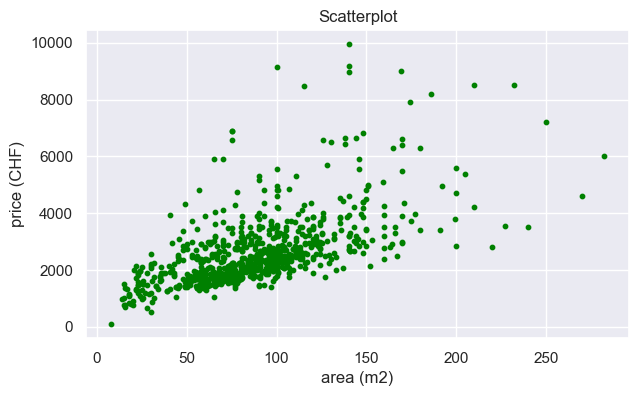

In [26]:
plt.figure(figsize=(7,4)) # create figure
plt.scatter(df['area'], # x variable
           df['price'], # y variable
           color="green", # color of dots
           alpha=1.0, # transparency of dots
           s=10) # size of dots
plt.title('Scatterplot', fontsize=12) # add title
plt.xlabel('area (m2)') # add x label
plt.ylabel('price (CHF)') # add y label
plt.show() # show plot

### Scatterplot (matplotlib) with regression line

In [27]:
# Subset
df_sub = df.loc[(df.price >= 1000)] # subset data frame
print(df_sub.shape) # show number of rows and columns

# Scatterplot
plt.figure(figsize=(7,4)) # create figure
plt.plot(df_sub.area, # x variable
         df_sub.price, # y variable
         'o', # type of plot
         markersize=3.5, # size of dots
         color="green") # color of dots

# Regression line (b = slope, a=intercept)
b, a = np.polyfit(df_sub.area, df_sub.price, 1) # calculate slope and intercept
print(b) # print(b)
print(a) # print(a)

# Plot regression line
plt.plot(df_sub.area, # x variable
         b*df_sub.area + a, # y variable
         linewidth=1, # width of line
         linestyle='dashed', # style of line
         color='darkred') # color of line

# Add title and axes labels
plt.title('Scatterplot with regression line', fontsize=12) # add title
plt.ylabel('price', fontsize=12) # add y label
plt.xlabel('area', fontsize=12) # add x label

# Set fontsize of tick labels
plt.xticks(fontsize = 10) # set fontsize of x ticks
plt.yticks(fontsize = 10) # set fontsize of y ticks

plt.show() # show plot

(760, 17)
19.406299563782134
938.048778941209


### Scatterplot-matrix (seaborn)

In [28]:
sns.set(style="ticks", font_scale=0.8) # set style and font size
g = sns.PairGrid(df[['rooms', # select variables
                     'area', 
                     'price', 
                     'price_per_m2',
                     'pop_dens',
                     'frg_pct']], 
                 height=1.2, # set height
                 aspect=1) # set aspect
g.map_upper(sns.scatterplot,color='darkgreen', s=10) # set upper part of grid
g.map_lower(sns.scatterplot, color='darkgreen', s=10) # set lower part of grid
g.map_diag(plt.hist, color='brown') # set diagonal part of grid

### Hexagonal binning plot  (matplotlib)

In [29]:
# Subset
df_sub = df.loc[(df.price <= 6000) & (df.area <= 200)] # subset data frame
print(df_sub.shape) # show number of rows and columns

# Plot
fig = plt.figure( figsize=(7,4) ) # create figure
plt.hexbin(df_sub.area, df_sub.price, gridsize=30, cmap='Greens') # plot hexbin

# Set labels
plt.xlabel('area', fontsize=12, labelpad=10) # add x label
plt.ylabel('price', fontsize=12, labelpad=10) # add y label
plt.title('Two-dimensional histogram of price versus area', fontsize=12, pad=10) # add title

cb = plt.colorbar(label='count in bin') # add colorbar
cb.set_label('counts in bin') # add label to colorbar

(743, 17)


### Correlation heatmap (seaborn)

In [30]:
# Set font size for plot
sns.set(font_scale=0.8) # set font size

# Create correlation matrix as the basis for the heatmap
corr = df[['rooms', # select variables
            'area', 
            'price', 
            'price_per_m2',
            'pop_dens',
            'frg_pct']].corr().round(2) # round to two decimals
print(corr) # print correlation matrix

# Plot heatmap
plt.figure(figsize=(7,4)) # create figure
sns.heatmap(corr, # correlation matrix
            cmap="BrBG", # color scheme
            annot=False) # show values in cells

              rooms  area  price  price_per_m2  pop_dens  frg_pct
rooms          1.00  0.84   0.47         -0.47     -0.31    -0.27
area           0.84  1.00   0.61         -0.46     -0.26    -0.26
price          0.47  0.61   1.00          0.29      0.29     0.09
price_per_m2  -0.47 -0.46   0.29          1.00      0.62     0.35
pop_dens      -0.31 -0.26   0.29          0.62      1.00     0.66
frg_pct       -0.27 -0.26   0.09          0.35      0.66     1.00


<Axes: >

### Bubble plot (seaborn)

In [31]:
# Subset of df
df_sub = df.loc[(df['rooms'] >= 2.5) & (df['rooms'] <= 4.5)] # subset data frame

plt.figure(figsize=(7,4)) # create figure
plt.ticklabel_format(style='plain') # remove scientific notation
cmap = sns.cubehelix_palette(dark=.3, light=3, as_cmap=True) # set color scheme

ax = sns.scatterplot(x="area", # x variable
                     y="price", # y variable
                     size="rooms", # determines bubble size
                     hue="pop_dens",  # determines color
                     palette="Set2", # set color scheme
                     data=df_sub) # data frame

# Set title and axes
ax.set_title('Price vs area', fontsize = 12) # add title
ax.set_xlabel('area', fontsize = 10) # add x label
ax.set_ylabel('price', fontsize = 10) # add y label
ax.legend([],[], frameon=False) # skip legend

### Jupyter notebook --footer info-- (please always provide this at the end of each notebook)

In [32]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
NT
Windows | 10
Datetime: 2023-12-27 12:12:05
Python Version: 3.11.7
-----------------------------------
